In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def alpha_polynomial(staleness, a_exp):
    return (1 / ((1 + staleness)**a_exp))

def alpha_exponential(staleness, a_exp):
    return np.exp(-a_exp * staleness)

def beta_polynomial(loss, b_exp):
    return (1 - (1 / ((1 + loss)**b_exp)))

def beta_polynomial_upshift(loss, b_exp):
    return (1 - (1 / ((1 + loss)**b_exp)) + 0.35)

def beta_exponential(loss, b_exp):
    return 1 - np.exp(-b_exp * loss)

In [6]:
def weight_factor(scale, staleness, a_exp, loss, b_exp, alpha_type='polynomial', beta_type='polynomial'):
    if alpha_type == 'polynomial':
        alpha = alpha_polynomial(staleness, a_exp)
    elif alpha_type == 'exponential':
        alpha = alpha_exponential(staleness, a_exp)
    else:
        raise ValueError('Invalid alpha type')
    
    if beta_type == 'polynomial':
        beta = beta_polynomial(loss, b_exp)
    elif beta_type == 'polynomial_upshift':
        beta = beta_polynomial_upshift(loss, b_exp)
    elif beta_type == 'exponential':
        beta = beta_exponential(loss, b_exp)
    else:
        raise ValueError('Invalid beta type')
    
    # weight_factor range is [0, 1]
    return ((scale) * alpha) + ((1-scale) * beta)
    

In [7]:
staleness_vec = np.linspace(0, 20, 21) # limit of staleness ??
loss_vec = np.linspace(0, 30, 31)  # limit of loss ??

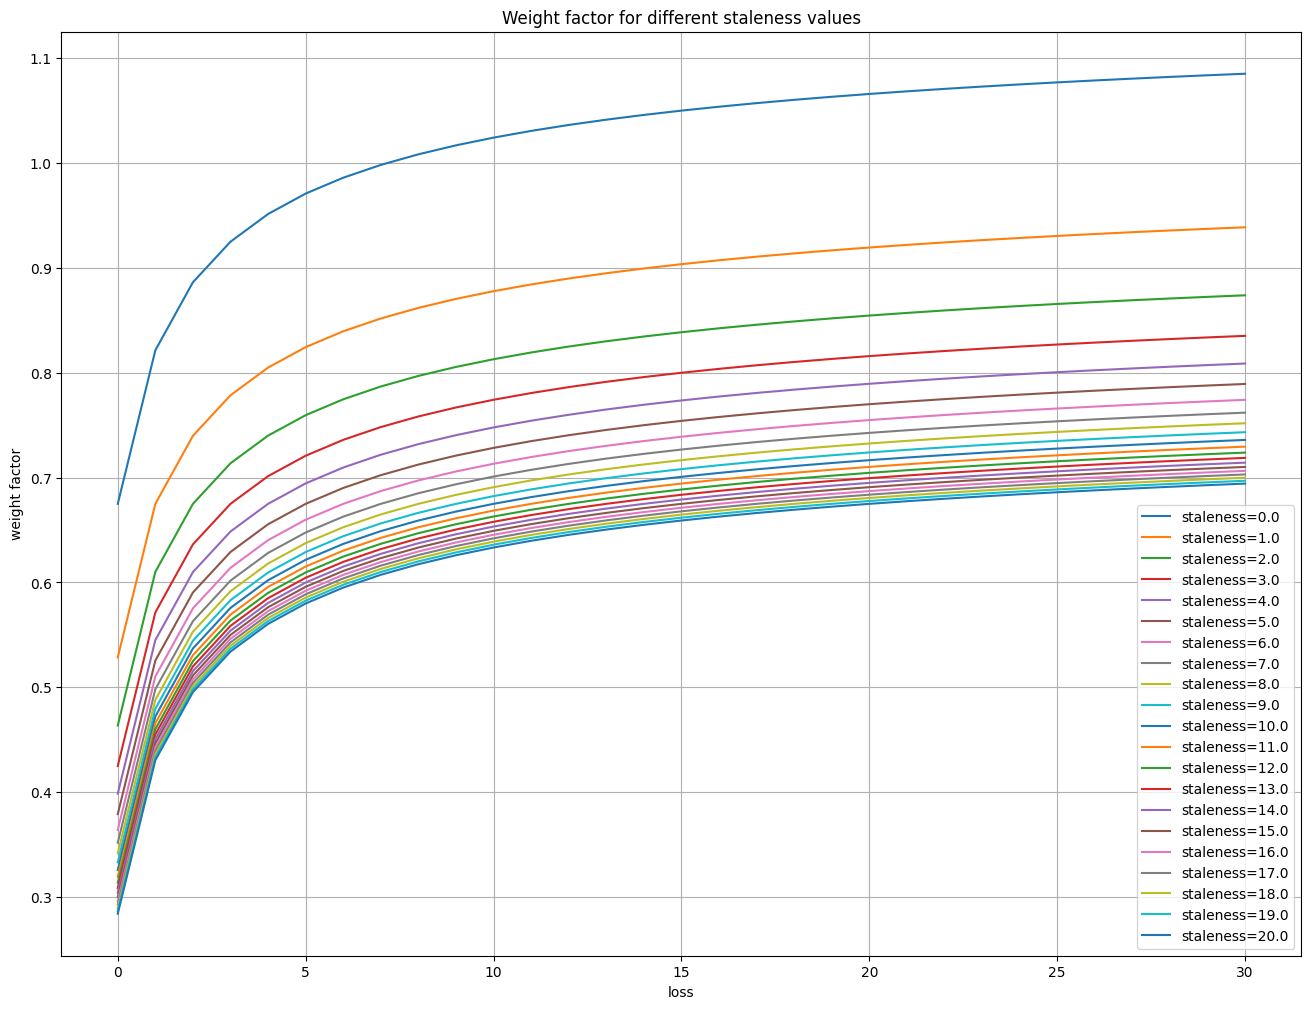

In [8]:
plt.figure(figsize=(16, 12))
for s in staleness_vec:
    plt.plot(loss_vec, weight_factor(scale=0.5, staleness=s, a_exp=0.5, loss=loss_vec, b_exp=0.5, alpha_type='polynomial', beta_type='polynomial_upshift'), label=f'staleness={s}')
plt.xlabel('loss')
plt.ylabel('weight factor')
plt.legend()
plt.title('Weight factor for different staleness values')
plt.grid()
plt.show()


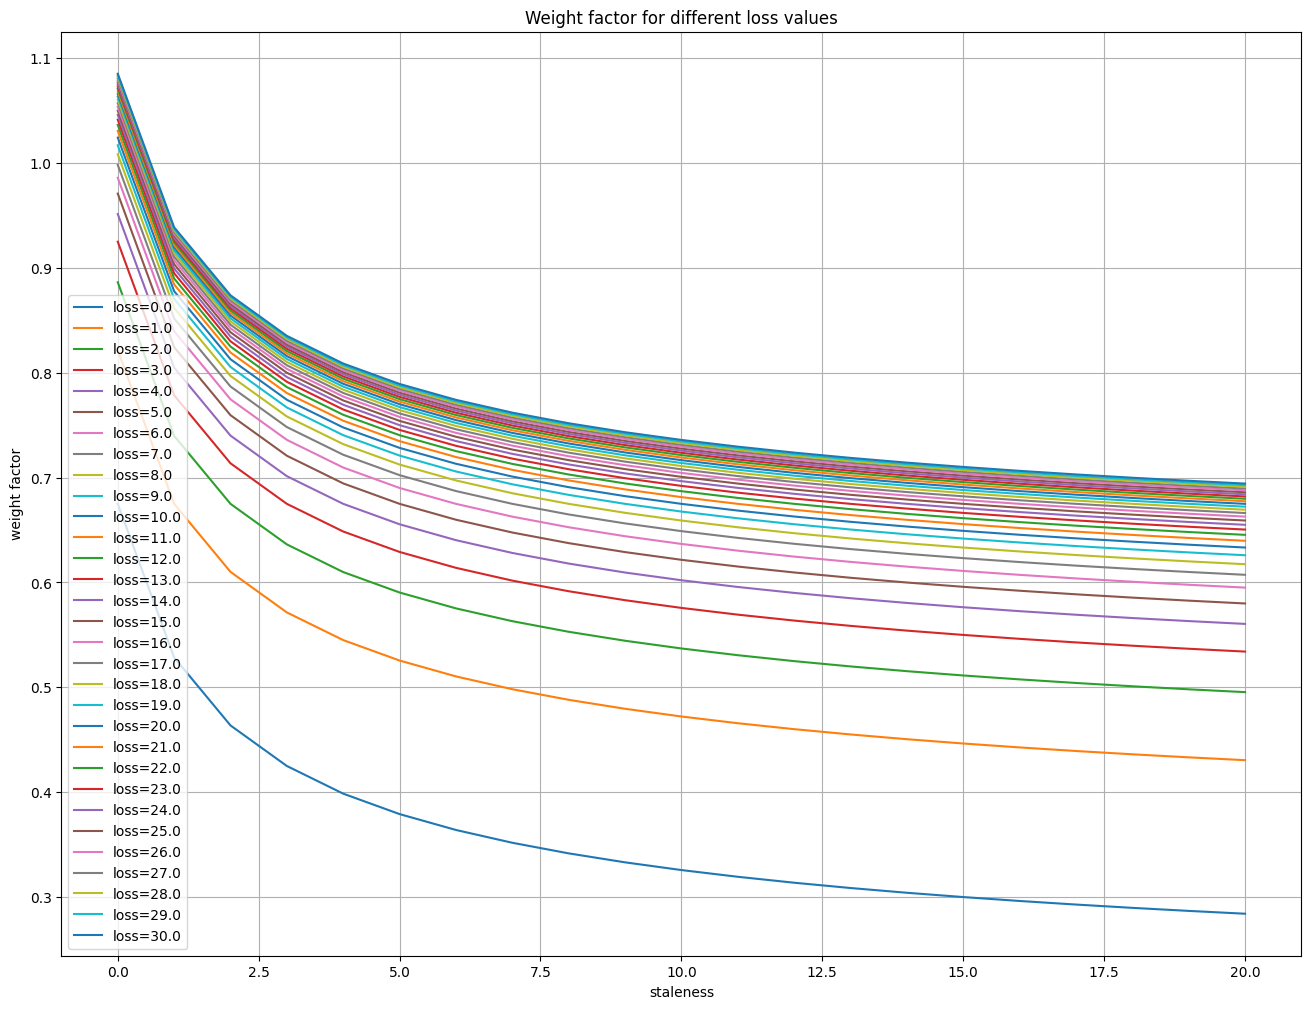

In [9]:
plt.figure(figsize=(16, 12))
for l in loss_vec:
    plt.plot(staleness_vec, weight_factor(scale=0.5, staleness=staleness_vec, a_exp=0.5, loss=l, b_exp=0.5, alpha_type='polynomial', beta_type='polynomial_upshift'), label=f'loss={l}')
plt.xlabel('staleness')
plt.ylabel('weight factor')
plt.legend()
plt.title('Weight factor for different loss values')
plt.grid()
plt.show()

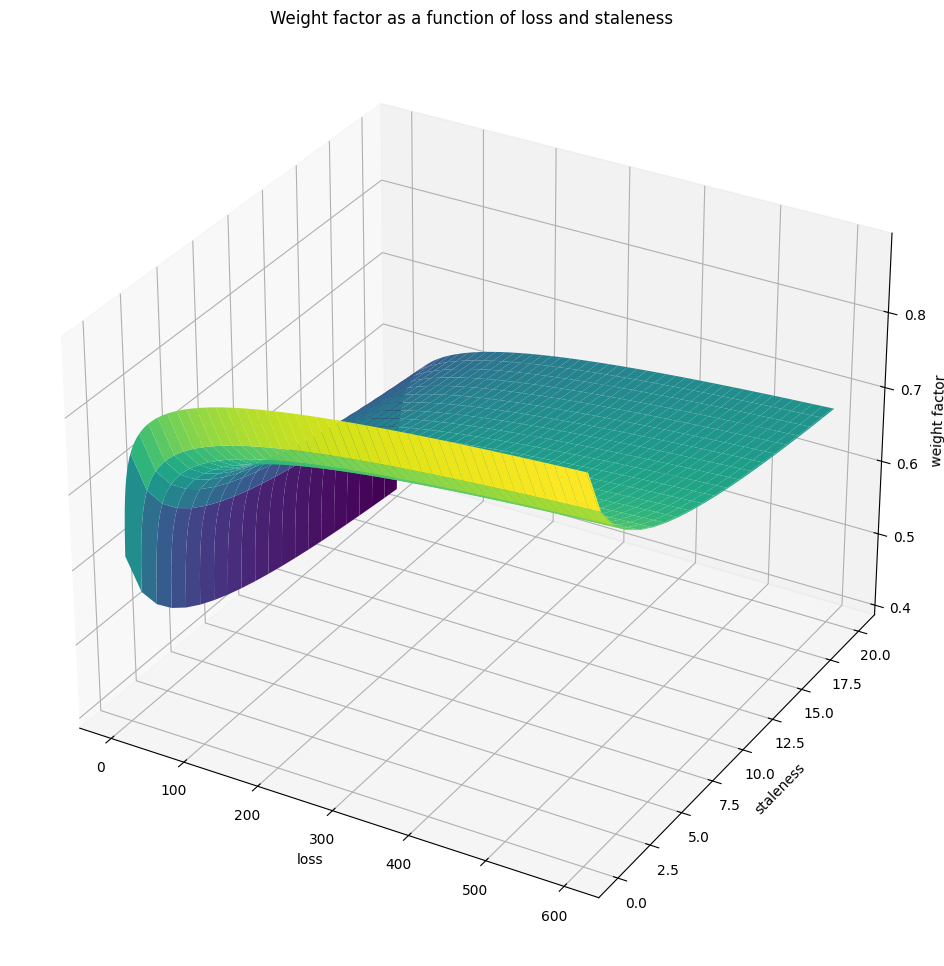

In [12]:
# loss on x axis, staleness on y axis
# weight factor as color
# 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(loss_vec, staleness_vec)
Z = weight_factor(0.4, staleness=Y, a_exp=0.25, loss=X, b_exp=0.1, alpha_type='polynomial', beta_type='polynomial_upshift')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('loss')
ax.set_ylabel('staleness')
ax.set_zlabel('weight factor')
plt.title('Weight factor as a function of loss and staleness')
plt.show()

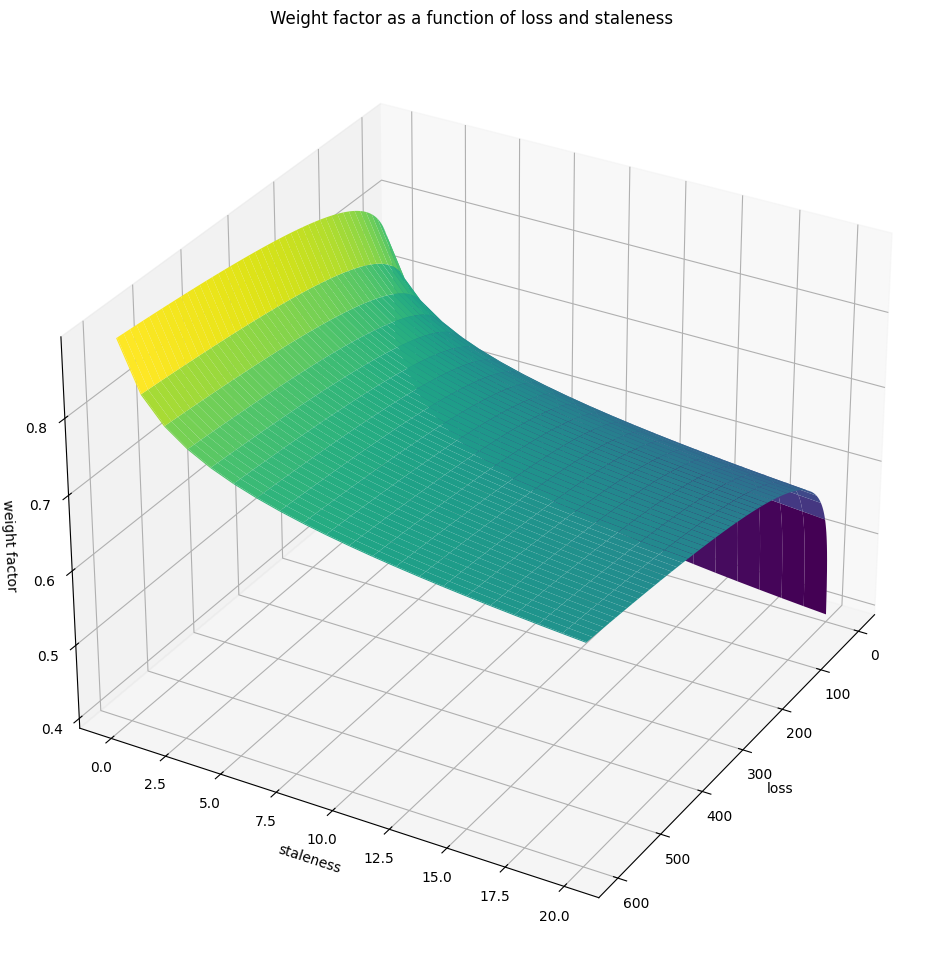

In [13]:
# rotate the above plot to see the shape
# 3D plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(loss_vec, staleness_vec)
Z = weight_factor(0.4, staleness=Y, a_exp=0.25, loss=X, b_exp=0.1, alpha_type='polynomial', beta_type='polynomial_upshift')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('loss')
ax.set_ylabel('staleness')
ax.set_zlabel('weight factor')
ax.view_init(30, 30)
plt.title('Weight factor as a function of loss and staleness')
plt.show()